In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import 'Seaborn' 
import seaborn as sns

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

import matplotlib.style

# import function to perform linear regression
from sklearn.linear_model import LinearRegression


# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error




# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

# import function for lasso regression
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("./Dataset/AirBNB.csv")

In [3]:
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.000000,1.000000,strict,True,f,100.000000,1.000000,1.000000,5.010635
1,6304928,Entire home/apt,7.000000,1.000000,strict,True,t,93.000000,3.000000,3.000000,5.129899
2,7919400,Entire home/apt,5.000000,1.000000,moderate,True,t,92.000000,1.000000,3.000000,4.976734
3,13418779,Entire home/apt,4.000000,1.000000,flexible,True,f,NaN,2.000000,2.000000,6.620073
4,3808709,Entire home/apt,2.000000,1.000000,moderate,True,t,40.000000,0.000000,1.000000,4.744932


In [4]:
df.dtypes

id                        int64
room_type                object
accommodates            float64
bathrooms               float64
cancellation_policy      object
cleaning_fee             object
instant_bookable         object
review_scores_rating    float64
bedrooms                float64
beds                    float64
log_price               float64
dtype: object

In [5]:
df.shape

(74111, 11)

In [6]:
# 5 number summary 
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,74111.000000,11266617.102468,6081734.886894,344.000000,6261964.500000,12254147.000000,16402260.500000,21230903.000000
accommodates,74108.000000,3.155125,2.153603,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,73908.000000,1.235272,0.582054,0.000000,1.000000,1.000000,1.000000,8.000000
review_scores_rating,57389.000000,94.067365,7.836556,20.000000,92.000000,96.000000,100.000000,100.000000
bedrooms,74019.000000,1.265797,0.852149,0.000000,1.000000,1.000000,1.000000,10.000000
beds,73980.000000,1.710868,1.254142,0.000000,1.000000,1.000000,2.000000,18.000000
log_price,74111.000000,4.782069,0.717394,0.000000,4.317488,4.709530,5.220356,7.600402


In [7]:
df = df.drop('id',axis=1)
#only 2 axis 0 and 1 in Pandas

In [8]:
df.head(10)

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.000000,1.000000,strict,True,f,100.000000,1.000000,1.000000,5.010635
1,Entire home/apt,7.000000,1.000000,strict,True,t,93.000000,3.000000,3.000000,5.129899
2,Entire home/apt,5.000000,1.000000,moderate,True,t,92.000000,1.000000,3.000000,4.976734
3,Entire home/apt,4.000000,1.000000,flexible,True,f,NaN,2.000000,2.000000,6.620073
4,Entire home/apt,2.000000,1.000000,moderate,True,t,40.000000,0.000000,1.000000,4.744932
5,Private room,2.000000,1.000000,strict,True,t,100.000000,1.000000,1.000000,4.442651
6,Entire home/apt,3.000000,1.000000,moderate,True,t,97.000000,1.000000,1.000000,4.418841
7,Entire home/apt,2.000000,1.000000,moderate,True,f,93.000000,1.000000,1.000000,4.787492
8,Private room,2.000000,1.000000,moderate,True,f,99.000000,1.000000,1.000000,4.787492
9,Private room,2.000000,1.000000,moderate,True,t,90.000000,1.000000,1.000000,3.583519


In [9]:
df.shape

(74111, 10)

In [10]:
#Drop ids first and then drop duplicates 
#Duplicates will make no contribution to Model Training

In [11]:
# 5 number summary including categorical variables
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74106,3,Entire home/apt,41308,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74108.000000,NaN,NaN,NaN,3.155125,2.153603,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,73908.000000,NaN,NaN,NaN,1.235272,0.582054,0.000000,1.000000,1.000000,1.000000,8.000000
cancellation_policy,74103,3,strict,32500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74107,2,True,54399,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74111,2,f,54660,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,57389.000000,NaN,NaN,NaN,94.067365,7.836556,20.000000,92.000000,96.000000,100.000000,100.000000
bedrooms,74019.000000,NaN,NaN,NaN,1.265797,0.852149,0.000000,1.000000,1.000000,1.000000,10.000000
beds,73980.000000,NaN,NaN,NaN,1.710868,1.254142,0.000000,1.000000,1.000000,2.000000,18.000000
log_price,74111.000000,NaN,NaN,NaN,4.782069,0.717394,0.000000,4.317488,4.709530,5.220356,7.600402


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [13]:
for columns in df.columns:
    if df[columns].dtype=='object':
        print(columns.title(),':',df[columns].nunique())
        print(df[columns].value_counts().sort_values())
        print("\n")

Room_Type : 3
room_type
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: count, dtype: int64


Cancellation_Policy : 3
cancellation_policy
moderate    19060
flexible    22543
strict      32500
Name: count, dtype: int64


Cleaning_Fee : 2
cleaning_fee
False    19708
True     54399
Name: count, dtype: int64


Instant_Bookable : 2
instant_bookable
t    19451
f    54660
Name: count, dtype: int64




In [14]:
df.instant_bookable.replace(['t','f'],['True','False'],inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [16]:
for columns in df.columns:
    if df[columns].dtype=='object':
        print(columns.title(),':',df[columns].nunique())
        print(df[columns].value_counts().sort_values())
        print("\n")

Room_Type : 3
room_type
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: count, dtype: int64


Cancellation_Policy : 3
cancellation_policy
moderate    19060
flexible    22543
strict      32500
Name: count, dtype: int64


Cleaning_Fee : 2
cleaning_fee
False    19708
True     54399
Name: count, dtype: int64


Instant_Bookable : 2
instant_bookable
True     19451
False    54660
Name: count, dtype: int64




In [17]:
df = pd.get_dummies(df,columns=['cancellation_policy','cleaning_fee','instant_bookable','room_type'], drop_first=True)

In [18]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True,room_type_Private room,room_type_Shared room
0,3.000000,1.000000,100.000000,1.000000,1.000000,5.010635,False,True,True,False,False,False
1,7.000000,1.000000,93.000000,3.000000,3.000000,5.129899,False,True,True,True,False,False
2,5.000000,1.000000,92.000000,1.000000,3.000000,4.976734,True,False,True,True,False,False
3,4.000000,1.000000,NaN,2.000000,2.000000,6.620073,False,False,True,False,False,False
4,2.000000,1.000000,40.000000,0.000000,1.000000,4.744932,True,False,True,True,False,False


In [19]:
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
instant_bookable_True               0
room_type_Private room              0
room_type_Shared room               0
dtype: int64

In [20]:
#Use previous cell values for time-series data
#For Numerical variables use mean or median 
#For Categorical variables use mode

In [21]:
for columns in df.columns:
    if df[columns].dtype =='object':
        mode = df[columns].mode()[0]
        df[columns]= df[columns].fillna(mode)
        df.isnull.sum()

In [22]:
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
instant_bookable_True               0
room_type_Private room              0
room_type_Shared room               0
dtype: int64

In [23]:
for columns in df.columns:
    if df[columns].dtype !='object':
        mean = df[columns].mean()
        df[columns]= df[columns].fillna(mean)
        df.isnull().sum()

In [24]:
df.isnull().sum()

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_True           0
room_type_Private room          0
room_type_Shared room           0
dtype: int64

In [25]:
#Are there any duplicates
dups = df.duplicated()
print("Number of duplicate rows = %d"%(dups.sum()))

Number of duplicate rows = 19998


In [26]:
print("Before",df.shape)
df.drop_duplicates(inplace=True)
print("After",df.shape)

Before (74111, 12)
After (54113, 12)


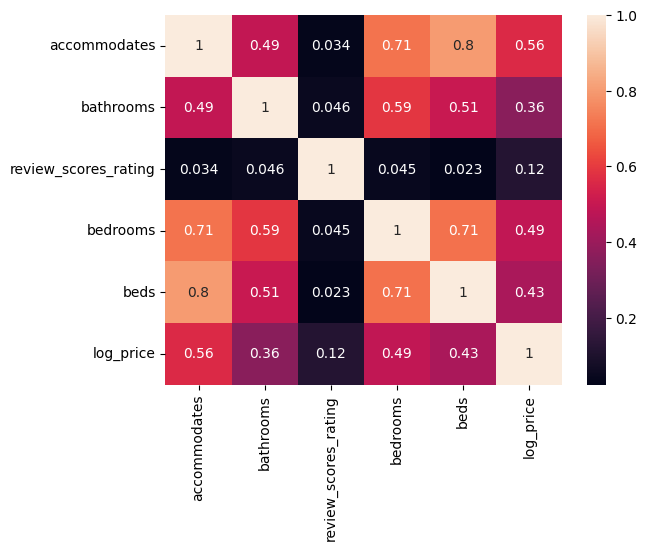

In [27]:
sns.heatmap(df.iloc[:,0:6].corr(), annot=True)
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54113 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54113 non-null  float64
 1   bathrooms                     54113 non-null  float64
 2   review_scores_rating          54113 non-null  float64
 3   bedrooms                      54113 non-null  float64
 4   beds                          54113 non-null  float64
 5   log_price                     54113 non-null  float64
 6   cancellation_policy_moderate  54113 non-null  bool   
 7   cancellation_policy_strict    54113 non-null  bool   
 8   cleaning_fee_True             54113 non-null  bool   
 9   instant_bookable_True         54113 non-null  bool   
 10  room_type_Private room        54113 non-null  bool   
 11  room_type_Shared room         54113 non-null  bool   
dtypes: bool(6), float64(6)
memory usage: 3.2 MB


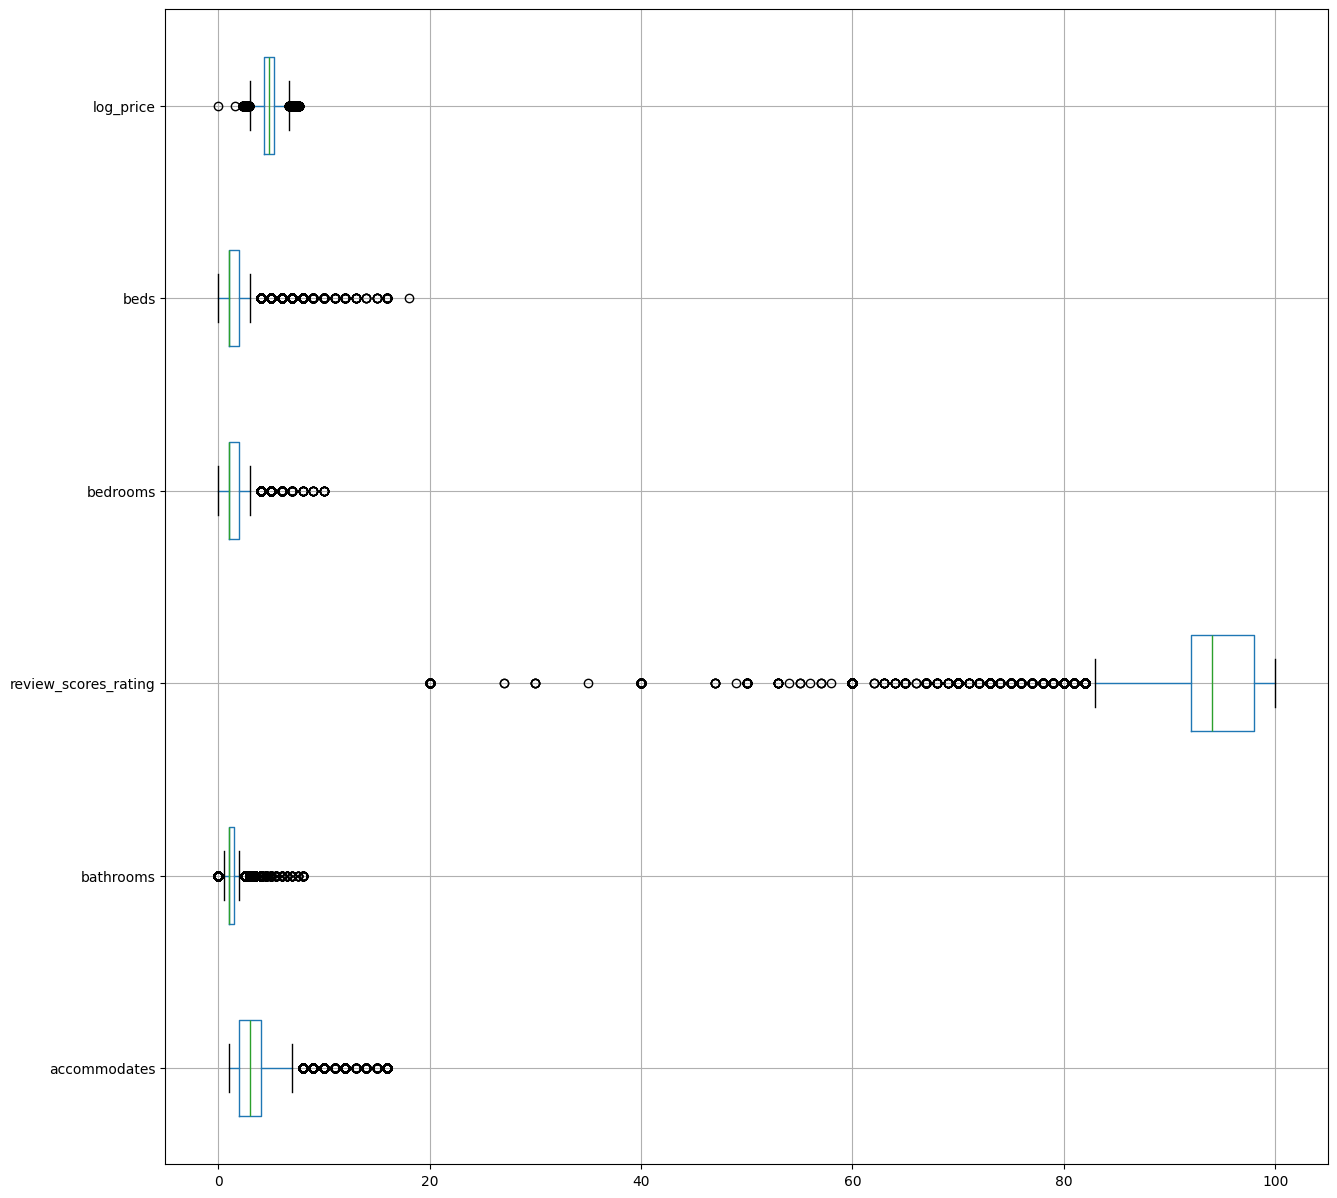

In [29]:
#Checking for outliers
cont = df.dtypes[(df.dtypes=='float64')].index
plt.figure(figsize=(15,15))
df[cont].boxplot(vert=0)
plt.show()

In [30]:
#Treating Outliers
def remove_outlier(col):
    Q1,Q3 = np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower_range = Q1-(1.5*IQR) 
    upper_range = Q3+(1.5*IQR) 
    return lower_range, upper_range

In [31]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column] = np.where(df[column]>ur,ur, df[column])
    df[column] = np.where(df[column]<lr,lr, df[column])


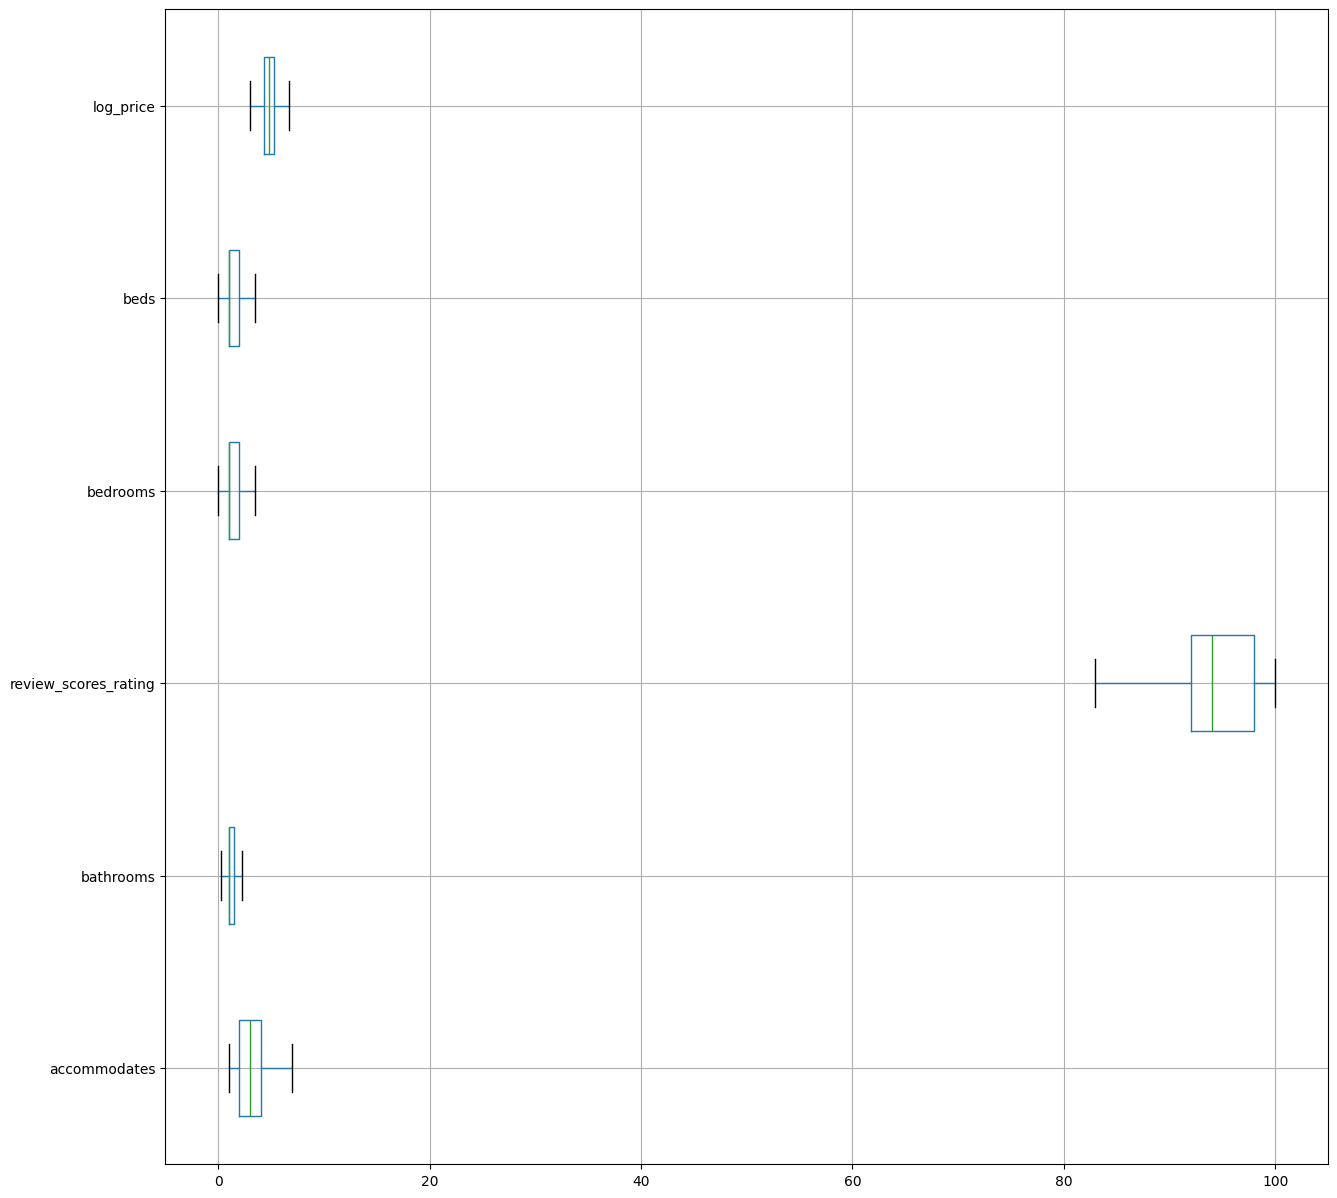

In [32]:
plt.figure(figsize=(15,15))
df[cont].boxplot(vert=0)
plt.show()

In [33]:
X = df.drop('log_price',axis=1)
y = df [['log_price']]
X.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True,room_type_Private room,room_type_Shared room
0,3.000000,1.000000,100.000000,1.000000,1.000000,False,True,True,False,False,False
1,7.000000,1.000000,93.000000,3.000000,3.000000,False,True,True,True,False,False
2,5.000000,1.000000,92.000000,1.000000,3.000000,True,False,True,True,False,False
3,4.000000,1.000000,94.067365,2.000000,2.000000,False,False,True,False,False,False
4,2.000000,1.000000,83.000000,0.000000,1.000000,True,False,True,True,False,False


In [34]:
y.head()

,log_price
0,5.010635
1,5.129899
2,4.976734
3,6.620073
4,4.744932


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [36]:
regression_model = LinearRegression()
regression_model.fit(X_train,y_train)

LinearRegression()

In [43]:
#y = mx+c
#y = m1x1+m2x2+....+mnxn+c

In [44]:
#Finding Coefficient of all Independent Variables
for idx, col_name in enumerate(X_train.columns):
    print("The Coefficient for {} is  {}".format(col_name,regression_model.coef_[0][idx]))

The Coefficient for accommodates is  0.09560094349603672
The Coefficient for bathrooms is  0.1846217350647708
The Coefficient for review_scores_rating is  0.011786091187998601
The Coefficient for bedrooms is  0.1600921914491861
The Coefficient for beds is  -0.04707334791513682
The Coefficient for cancellation_policy_moderate is  -0.06642020174381387
The Coefficient for cancellation_policy_strict is  -0.014545217171837273
The Coefficient for cleaning_fee_True is  -0.07549540369311855
The Coefficient for instant_bookable_True is  -0.06551696473920768
The Coefficient for room_type_Private room is  -0.6054238254431438
The Coefficient for room_type_Shared room is  -1.0643243483291156


In [45]:
#Finding intercept (c)
intercept = regression_model.intercept_[0]
print("The Intercept for our model is {}".format(intercept))

The Intercept for our model is 3.414346504584715


In [46]:
# Find R-Square error for Training data
regression_model.score(X_train,y_train)


0.5070131955407424

In [47]:
# Find R-Square error for Test data
regression_model.score(X_test,y_test)

0.5055716767294507

In [48]:
#As the metrics is 50% accurate the model will not be accurate, more data is needed.